# Credit Card Approval Prediction Using Logistic Regression

## Problem Statement:

Banking industries received so many applications for credit card request. Going through each request manually can be very time consuming, also prone to human errors. However, if we can use the historical data to build a model which can shortlist the candidates for approval that can be great.

##  Importing Libraries and Loading Data

First, loading and viewing the dataset. We find that since this data is confidential, the contributor of the dataset has anonymized the feature names.

In [1]:
#loading the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Nantha/Desktop/Nantha Kumar/SLRC/proj/credit card/crx.data",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## Inspecting the applications
The features of this dataset have been anonymized to protect the privacy, but this blog gives us a pretty good overview of the probable features. The probable features in a typical credit card application are Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income and finally the ApprovalStatus. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.

As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features. let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.

In [3]:
df.columns = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus']

In [4]:
df.shape

(690, 16)

We can see that there are **690** rows and **16** features

In [5]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## Descriptive Analysis

In [6]:
df.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


 We can observe that average income for all the users is 1017.4, the average year of employment 2.4 years

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            690 non-null object
Age               690 non-null object
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           690 non-null object
Income            690 non-null int64
ApprovalStatus    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


## Exploratory Data Analysis
We will analyse the data using visualizations. The Target variable is ApprovalStatus. We will do univariate, bivariate and multivariate analysis to find which features affect the target variable the most.

In [8]:
df['ApprovalStatus'].value_counts()

-    383
+    307
Name: ApprovalStatus, dtype: int64

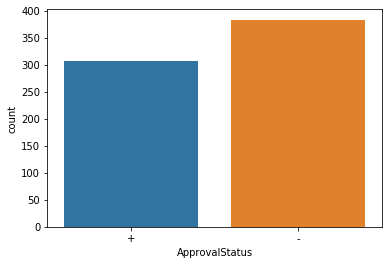

In [9]:
sns.countplot(df['ApprovalStatus'])
plt.show()

We can observe that the no of application rejected is more than the no of approved applications

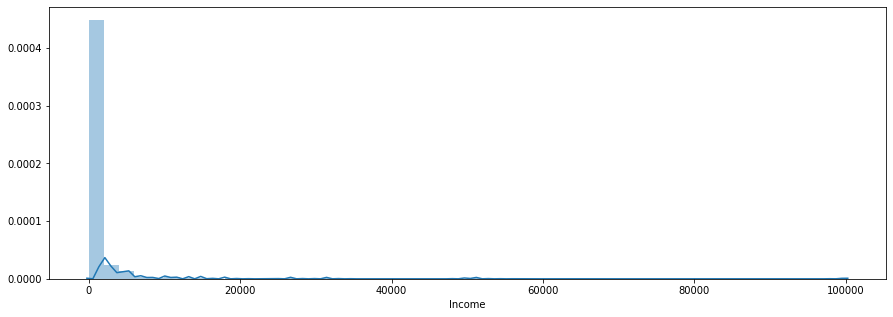

In [10]:
plt.subplots(figsize=(15,5))
sns.distplot(df['Income'])
plt.show()

We see that income is highly right skewed.

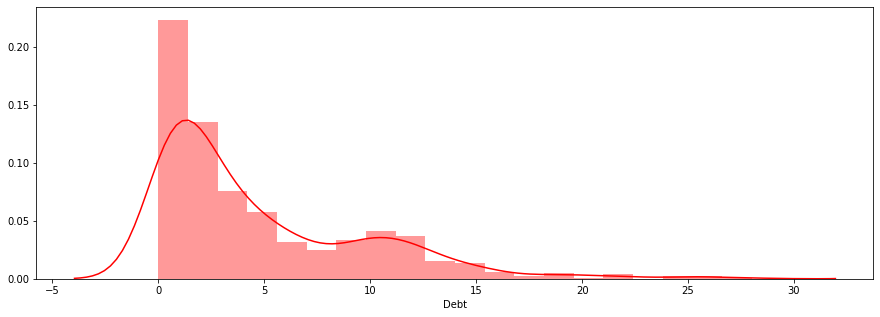

In [11]:
plt.subplots(figsize=(15,5))
sns.distplot(df['Debt'],color='r')
plt.show()

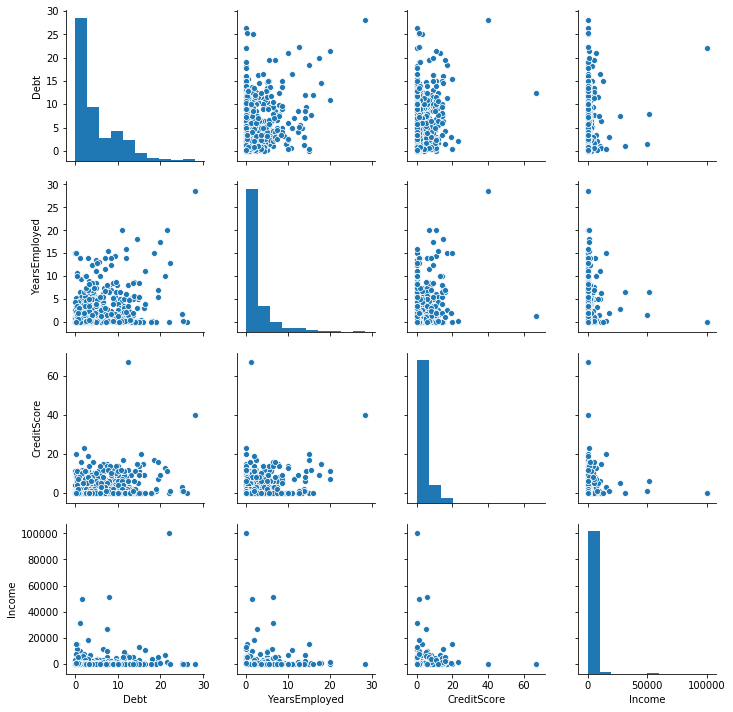

In [12]:
sns.pairplot(df)
plt.show()

Pairplot showing the correlation between elements.

## Handling the missing values

Our dataset contains both numeric and non-numeric data (specifically data that are of float64, int64 and object types). Specifically, the features 2, 7, 10 and 14 contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.
The dataset also contains values from several ranges. Some features have a value range of 0 - 28, some have a range of 2 - 67, and some have a range of 1017 - 100000. Apart from these, we can get useful statistical information (like mean, max, and min) about the features that have numerical values.
Finally, the dataset has missing values. The missing values in the dataset are labeled with '?', which can be seen in the last cell's output.
Now, let's temporarily replace these missing value question marks with NaN.

In [13]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

This shows that there is no null values in the dataset. But on closely examining the data we may find null values in the form of symbols or numbers.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            690 non-null object
Age               690 non-null object
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           690 non-null object
Income            690 non-null int64
ApprovalStatus    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


Closely looking at the object columns and checking the values in it we can find if there is any null values.

In [15]:
df['Gender'].unique()

array(['b', 'a', '?'], dtype=object)

We find that there is '?' in the dataset which is a null value.

In [16]:
df['Married'].unique()

array(['u', 'y', '?', 'l'], dtype=object)

Married column has a null value also. We will replace the '?' for the entire dataset.

In [17]:
# Replace the '?'s with NaN
df = df.replace({"?":np.nan})

In [18]:
df.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

Finally we found there are null values in Gender,Age,Married,BankCustomer,EducationLevel,Ethnicity and Zipcode.

## Handling the missing values for the numerical columns

We replaced all the question marks with NaNs. This is going to help us in the next missing value treatment that we are going to perform.

In [19]:
# Impute the missing values with mean imputation for the numeric columns
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

## Handling the missing values for categorical variables
We have successfully taken care of the missing values present in the numeric columns. There are still some missing values to be imputed for columns Gender,Age,Married,BankCustomer,EducationLevel,Ethnicity and Zipcode. All of these columns contain non-numeric data and this why the mean imputation strategy would not work here. This needs a different treatment.

We are going to impute these missing values with the most frequent values as present in the respective columns. This is good practice when it comes to imputing missing values for categorical data in general.

In [20]:
# Iterate over each column of df
for col in df:
    # Check if the column is of object type
    if (df[col].dtypes == 'object'):
        # Impute with the most frequent value / mode
        df = df.fillna(df[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

The missing values are now successfully handled. Now Let's see the heatmap for the dataframe.

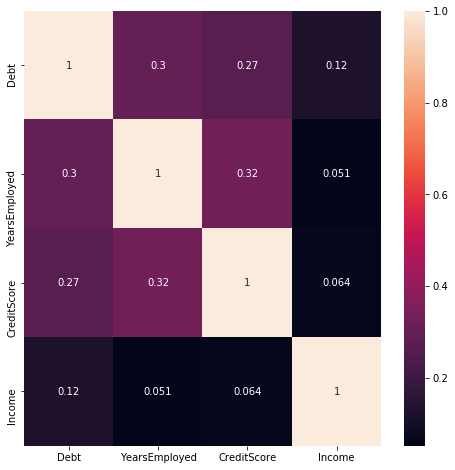

In [21]:
plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Preprocessing the data

There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into three main tasks:

Convert the non-numeric data into numeric.
Split the data into train and test sets.
Scale the feature values to a uniform range.
First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models (like XGBoost) (and especially the ones developed using scikit-learn) require the data to be in a strictly numeric format. We will do this by using a technique called label encoding.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            690 non-null object
Age               690 non-null object
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           690 non-null object
Income            690 non-null int64
ApprovalStatus    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [23]:
df_categorical=[]
for col in df:
    
    # Compare if the dtype is object
    if df[col].dtype=='object':
        df_categorical.append(col) 

In [24]:
df_categorical

['Gender',
 'Age',
 'Married',
 'BankCustomer',
 'EducationLevel',
 'Ethnicity',
 'PriorDefault',
 'Employed',
 'DriversLicense',
 'Citizen',
 'ZipCode',
 'ApprovalStatus']

In [25]:
df['ApprovalStatus'] = df['ApprovalStatus'].map({"+":1,"-":0})

In [26]:
df_categorical_data = df[['Gender',
 'Age',
 'Married',
 'BankCustomer',
 'EducationLevel',
 'Ethnicity',
 'PriorDefault',
 'Employed',
 'DriversLicense',
 'Citizen',
 'ZipCode']]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_categorical_data = df_categorical_data.apply(le.fit_transform)
df_categorical_data.head()

,Gender,Age,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ZipCode
0,1,156,2,1,13,8,1,1,0,0,68
1,0,328,2,1,11,4,1,1,0,0,11
2,0,89,2,1,11,4,1,0,0,0,96
3,1,125,2,1,13,8,1,1,1,0,31
4,1,43,2,1,13,8,1,0,0,2,37


In [27]:
# concat df_categorical with original df
df = df.drop(df_categorical_data.columns, axis=1)
df = pd.concat([df, df_categorical_data], axis=1)
df.head()

,Debt,YearsEmployed,CreditScore,Income,ApprovalStatus,Gender,Age,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ZipCode
0,0.000,1.25,1,0,1,1,156,2,1,13,8,1,1,0,0,68
1,4.460,3.04,6,560,1,0,328,2,1,11,4,1,1,0,0,11
2,0.500,1.50,0,824,1,0,89,2,1,11,4,1,0,0,0,96
3,1.540,3.75,5,3,1,1,125,2,1,13,8,1,1,1,0,31
4,5.625,1.71,0,0,1,1,43,2,1,13,8,1,0,0,2,37


## Splitting the dataset into train and test sets
We have successfully converted all the non-numeric values to numeric ones.

Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then apply the scaling.

Also, features like DriversLicense and ZipCode are not as important as the other features in the dataset for predicting credit card approvals. We should drop them to design our machine learning model with the best set of features. In Data Science literature, this is often referred to as feature selection.

In [28]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13 and convert the DataFrame to a NumPy array
df = df.drop(['DriversLicense', 'ZipCode'], axis=1)

# Segregate features and labels into separate variables
X = df.drop('ApprovalStatus',axis=1)
y = df['ApprovalStatus']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.3,
                                random_state=1)

## Scaling the data
The data is now split into two separate sets - train and test sets respectively. We are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data.

Now, let's try to understand what these scaled values mean in the real world. Let's use CreditScore as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a CreditScore of 1 is the highest since we're rescaling all the values to the range of 0-1.

In [29]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler 

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

## Fitting a logistic regression model to the train set
Essentially, predicting if a credit card application will be approved or not is a classification task. According to UCI, our dataset contains more instances that correspond to "Denied" status than instances corresponding to "Approved" status. Specifically, out of 690 instances, there are 383 (55.5%) applications that got denied and 307 (44.5%) applications that got approved.

This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the applications with respect to these statistics.

Let's start our machine learning modeling with a Logistic Regression model (a generalized linear model).

In [30]:
import warnings 
warnings.filterwarnings('ignore')

In [31]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Making predictions and evaluating performance

We will now evaluate our model on the test set with respect to classification accuracy. But we will also take a look the model's confusion matrix. In the case of predicting credit card applications, it is equally important to see if our machine learning model is able to predict the approval status of the applications as denied that originally got denied. If our model is not performing well in this aspect, then it might end up approving the application that should have been approved. The confusion matrix helps us to view our model's performance from these aspects.

In [32]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

# Print the confusion matrix of the logreg model
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred))

Accuracy of logistic regression classifier:  0.8599033816425121
Confusion Matrix
 [[98 24]
 [ 5 80]]


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       122
           1       0.77      0.94      0.85        85

    accuracy                           0.86       207
   macro avg       0.86      0.87      0.86       207
weighted avg       0.88      0.86      0.86       207



In [34]:
from sklearn.metrics import roc_auc_score, roc_curve

print('AUC for the model:',roc_auc_score(y_test,y_pred))

AUC for the model: 0.8722275795564127


## Grid searching and making the model perform better
The model  was able to yield an accuracy score of almost 84%.

For the confusion matrix, the first element of the of the first row of the confusion matrix denotes the true negatives meaning the number of negative instances (denied applications) predicted by the model correctly. And the last element of the second row of the confusion matrix denotes the true positives meaning the number of positive instances (approved applications) predicted by the model correctly.

We can perform a grid search of the model parameters to improve the model's ability to predict credit card approvals.

In [35]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01,0.001,0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = {"tol":tol, "max_iter":max_iter}

##  Finding the best performing model
We have defined the grid of hyperparameter values and converted them into a single dictionary format which GridSearchCV() expects as one of its parameters. Now, we will begin the grid search to see which values perform best.

In [36]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.853623 using {'max_iter': 100, 'tol': 0.01}


In [37]:
grid_model_result.best_score_

0.8536231884057971

We have achieved a score of 85% accuracy after using GridSearchCV